In [1]:
\l E:\pycharm\PycharmProjects\kdbq\columbiaHdb\
\c 100 5200
/distinct date
dts:select distinct date from bin10
dts_list: exec date from dts
/distinct month
ms:select distinct date.month from dts
ms:exec month from ms
/distinct id
tks:select distinct id from bin10
tks_list: exec id from tks
\s

6i


6i


# 1

In [2]:
ret:{[mid;dt] (neg 1) + mid%(xprev[6*dt;mid])}
dI:{[I;dt] I- xprev[6*dt;I]}
computeImpact: {[trade;vol;adv;h] 
    dt:1;
    beta: (log 2)%h*6;
    dv:vol*sqrt (6*60*6.5);
    lamb:0.5;
    b:beta*dt;
    (neg count trade)#ema[b;][0,(lamb*dv*trade%adv)%b]}

w5_proc:{[dt]
    data:select from bin10 where date=dt;
    data: update reverse fills reverse date,
     reverse fills reverse mid,
     reverse fills reverse spread,
     reverse fills reverse vol,
     reverse fills reverse adv
     by id from data;
    hs: 1 5 30 60;
    dt : 1 15 60;
    tb2:data cross ([]hs:hs);
    tb3: update I: computeImpact[trade;vol;adv;first hs] by id,hs from tb2;
    tb3:tb3 cross ([]dt:dt);
    tb3: update ret: ret[mid;first dt],delta_I: dI[I;first dt] by id,hs,dt from tb3;
    tb3: update cov_r_dI: ret*delta_I,var_dI:delta_I xexp 2,var_ret:ret xexp 2 by id,hs,dt from tb3;
    0!select first cov_r_dI,first var_dI,first var_ret by date,id,hs,dt from tb3 / replace negative value with zero
    }
/\t w5_proc[2019.01.03]

# 2

In [2]:
\t tb2:raze w5_proc each 2#dts_list
tb2_raze
save `E:/pycharm/PycharmProjects/kdbq/w6/tb2_raze

8669


[0;31mtb2_raze[0m: [0;31mtb2_raze[0m

In [12]:
load `E:/pycharm/PycharmProjects/kdbq/w6/tb2_raze

`tb2_raze


# 3

In [4]:
reg_data_gen_date:{[ticker;dt]
    data:select from bin10 where date=dt;
    data:select from data where id=ticker;
    data: update reverse fills reverse date,
     reverse fills reverse mid,
     reverse fills reverse spread,
     reverse fills reverse vol,
     reverse fills reverse adv
     by id from data;
    hs: 1 5 30 60;
    dt : 1 15 60;
    tb2:data cross ([]hs:hs);
    tb3: update I: computeImpact[trade;vol;adv;first hs] by id,hs from tb2;
    tb3:tb3 cross ([]dt:dt);
    update ret: ret[mid;first dt],delta_I: dI[I;first dt] by id,hs,dt from tb3;
    select date,time,id,hs,dt,ret,delta_I from tb3
    }

reg_data_id:{[id]
    show id;
    rd:reg_data_gen_date[id;] each dts_list;
    rd:raze rd;
    select lambda:cov[delta_I;ret]%var[delta_I],r2:(cov[delta_I;ret] xexp 2)%var[delta_I]*var[ret] by id,hs,dt from rd
    }

In [5]:
\t tb3:reg_data_id peach tks_list

5
1
4
0
3
2
6
10
8
9
11
7
16
17
15
13
12
14
19
23
18
22
21
20
25
24
28
27
29
26
30
31
33
34
35
32
36
37
38
39
41
40
42
43
45
46
47
44
48
49
50
51
52
53
54
56
55
57
58
59
60
61
62
65
63
64
67
66
68
69
70
71
72
73
75
74
76
77
78
79
83
80
81
82
84
86
85
89
87
88
90
92
91
95
93
94
96
98
97
101
99
100
102
103
104
107
106
105
108
110
113
109
111
112
114
116
119
115
118
117
120
121
125
122
123
124
126
127
131
128
130
129
132
133
137
134
135
136
138
140
143
139
141
142
144
149
145
147
146
148
150
155
154
153
152
151
156
161
160
157
158
159
162
167
166
163
165
164
168
173
172
169
170
171
174
179
178
175
177
176
180
185
184
183
182
181
186
191
190
187
189
188
192
197
196
193
195
194
198
203
202
199
200
201
204
209
208
206
207
205
210
215
213
214
212
211
216
221
220
217
218
219
222
227
224
226
225
223
228
233
232
234
229
231
230
239
238
240
237
235
236
245
244
246
242
241
243
251
250
252
247
248
249
257
258
256
253
255
254
263
264
262
259
260
261
269
270
268
265
266
267
275
276
274
271
272
273
28

338848


In [7]:
tb3_raze : raze tb3
tb3_raze

id hs dt| lambda    r2         
--------| ---------------------
0  1  1 | 4.778639  0.033384   
0  1  15| 6.994172  0.005683767
0  1  60| 8.115361  0.002394221
0  5  1 | 5.943815  0.062611   
0  5  15| 9.586369  0.04327606 
0  5  60| 9.410341  0.01626625 
0  30 1 | 6.194013  0.07065028 
0  30 15| 9.064734  0.08513194 
0  30 60| 7.413312  0.05511805 
0  60 1 | 6.205694  0.07132828 
0  60 15| 8.524666  0.08705744 
0  60 60| 6.698363  0.06645032 
1  1  1 | 3.632643  0.02750362 
1  1  15| 8.537002  0.008362731
1  1  60| 11.81523  0.00495404 
1  5  1 | 4.37113   0.04643848 
1  5  15| 10.10157  0.04809649 
1  5  60| 11.87167  0.0249661  
1  30 1 | 4.35368   0.04928548 
1  30 15| 9.315581  0.09171256 
1  30 60| 8.346246  0.06683981 
1  60 1 | 4.329924  0.04931667 
1  60 15| 8.69247   0.09283175 
1  60 60| 7.163524  0.07333651 
2  1  1 | 0.8722235 0.00630295 
2  1  15| 7.974333  0.006435342
2  1  60| 9.33689   0.003024579
2  5  1 | 0.9576311 0.01040108 
2  5  15| 10.60543  0.0462049  
2  5  60

In [8]:
save `E:/pycharm/PycharmProjects/kdbq/w6/tb3_raze.csv

`:E:/pycharm/PycharmProjects/kdbq/w6/tb3_raze.csv


C:\Users\zhuyu\anaconda3\envs\jupyterqenv\lib\site-packages\numpy\core\getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
C:\Users\zhuyu\anaconda3\envs\jupyterqenv\lib\site-packages\numpy\core\getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
C:\Users\zhuyu\anaconda3\envs\jupyterqenv\lib\site-packages\numpy\core\getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
C:\Users\zhuyu\anaconda3\envs\jupyterqenv\lib\site-packages\numpy\core\getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


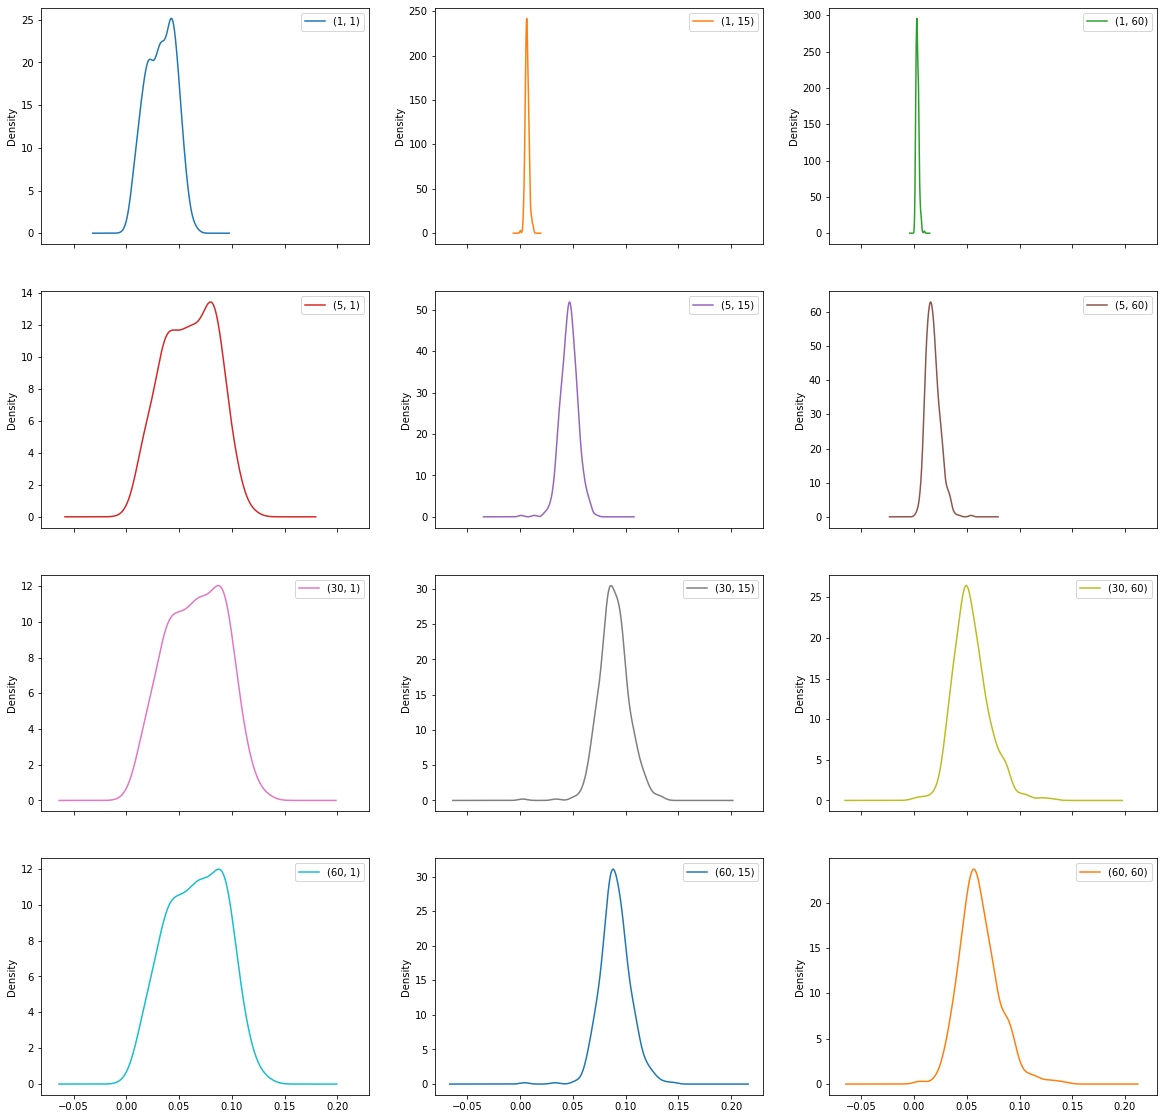

In [9]:
p)import matplotlib.pyplot as plt
p)import pandas as pd
p)q3=pd.read_csv('E:/pycharm/PycharmProjects/kdbq/w6/tb3_raze.csv')
p)q3.pivot_table(index='id',columns=['hs','dt'],values='r2').plot(subplots=True,kind='kde',layout=(4,3),figsize=(20,20))
p)plt.show()

# 4

In [3]:
reg_data_sub_month:{[dt]
    data:select from bin10 where date=dt;
    data: update reverse fills reverse date,
     reverse fills reverse mid,
     reverse fills reverse spread,
     reverse fills reverse vol,
     reverse fills reverse adv
     by id from data;
    hs: 1 5 30 60;
    dt : 1 15 60;
    tb2:data cross ([]hs:hs);
    tb3: update I: computeImpact[trade;vol;adv;first hs] by id,hs from tb2;
    tb3:tb3 cross ([]dt:dt);
    tb3: update ret: ret[mid;first dt],delta_I: dI[I;first dt] by id,hs,dt from tb3;
    tb3:select ret_I:sum ret*delta_I,delta_I2:sum delta_I xexp 2 ,ret2:sum (ret xexp 2),ret_sum:sum ret,dI_sum:sum delta_I,ct: count delta_I by date.month,hs,dt from tb3;
    tb3
    }

reg_data_month:{[m]
    show m;
    sub_dts: select from dts where date.month=m;
    sub_dts: exec date from sub_dts;
    rd:reg_data_sub_month each sub_dts;
    rd:raze rd;
    rd:select 
            lambda:sum[ret_I]%sum[delta_I2],
            var_dI:sum[delta_I2]%sum[ct],
            var_ret:sum[ret2]%sum[ct],
            cov_r_I:sum[ret_I]%sum[ct],
            ret_avg:sum[ret_sum]%sum[ct],
            dI_avg:sum[dI_sum]%sum[ct] by month,hs,dt from rd;
    update a:ret_avg-lambda*dI_avg from rd
    }

In [61]:
\t tb4:reg_data_month each ms

2019.01m
2019.02m
2019.03m
2019.04m
2019.05m
2019.06m
2019.07m
2019.08m
2019.09m
2019.10m
2019.11m
2019.12m


492453


In [62]:
tb4_raze: raze tb4
tb4_1:update last_lambda:xprev[12;lambda],last_a:xprev[12;a],last_SST:xprev[12;var_ret] from tb4_raze
tb4_2: select from tb4_1 where month>2019.01m
save `E:/pycharm/PycharmProjects/kdbq/w6/tb4_2

`:E:/pycharm/PycharmProjects/kdbq/w6/tb4_2


In [4]:
load `E:/pycharm/PycharmProjects/kdbq/w6/tb4_2

`tb4_2


In [5]:
daily_resid:{[param_tb;dt]
    /cal daily ret , delta I
    data:select from bin10 where date=dt;
    data: update reverse fills reverse date,
     reverse fills reverse mid,
     reverse fills reverse spread,
     reverse fills reverse vol,
     reverse fills reverse adv
     by id from data;
    hs: 1 5 30 60;
    dt : 1 15 60;
    tb2:data cross ([]hs:hs);
    tb3: update I: computeImpact[trade;vol;adv;first hs] by id,hs from tb2;
    tb3:tb3 cross ([]dt:dt);
    day_tb: update date.month,ret: ret[mid;first dt],delta_I: dI[I;first dt] by id,hs,dt from tb3;
    tb_joined:day_tb lj param_tb;
    tb:select 
            resid_sq_sum: sum (ret-last_a-last_lambda*delta_I) xexp 2 ,
            first last_SST,
            ct:count ret by month,hs,dt from tb_joined;
    tb
    }

oop_r2:{[tb;m]
    show m;
    param_tb:select from tb where month=m;
    sub_dts: select from dts where date.month=m;
    sub_dts: exec date from sub_dts;
    daily_tbs:daily_resid[param_tb;] each sub_dts;
    monthly_tb: raze daily_tbs;
    monthly_tb:select 
                        SSR:(sum resid_sq_sum) % sum ct,
                        last_SST
                        by month,hs,dt from monthly_tb;
    monthly_tb:update oop_r2:1-SSR%last_SST by month,hs,dt from monthly_tb;
    select month,hs,dt,oop_r2 from monthly_tb
    }

In [6]:
/load `E:/pycharm/PycharmProjects/kdbq/w6/tb4_2
\t oop_r2_tb:oop_r2[tb4_2;] each -11#ms 

2019.02m
2019.03m
2019.04m
2019.05m
2019.06m
2019.07m
2019.08m
2019.09m
2019.10m
2019.11m
2019.12m


545468


In [7]:
oop_r2_tb_raze: raze oop_r2_tb

In [8]:
save `E:/pycharm/PycharmProjects/kdbq/w6/oop_r2_tb_raze.csv

`:E:/pycharm/PycharmProjects/kdbq/w6/oop_r2_tb_raze.csv


C:\Users\zhuyu\anaconda3\envs\jupyterqenv\lib\site-packages\numpy\core\getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
C:\Users\zhuyu\anaconda3\envs\jupyterqenv\lib\site-packages\numpy\core\getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


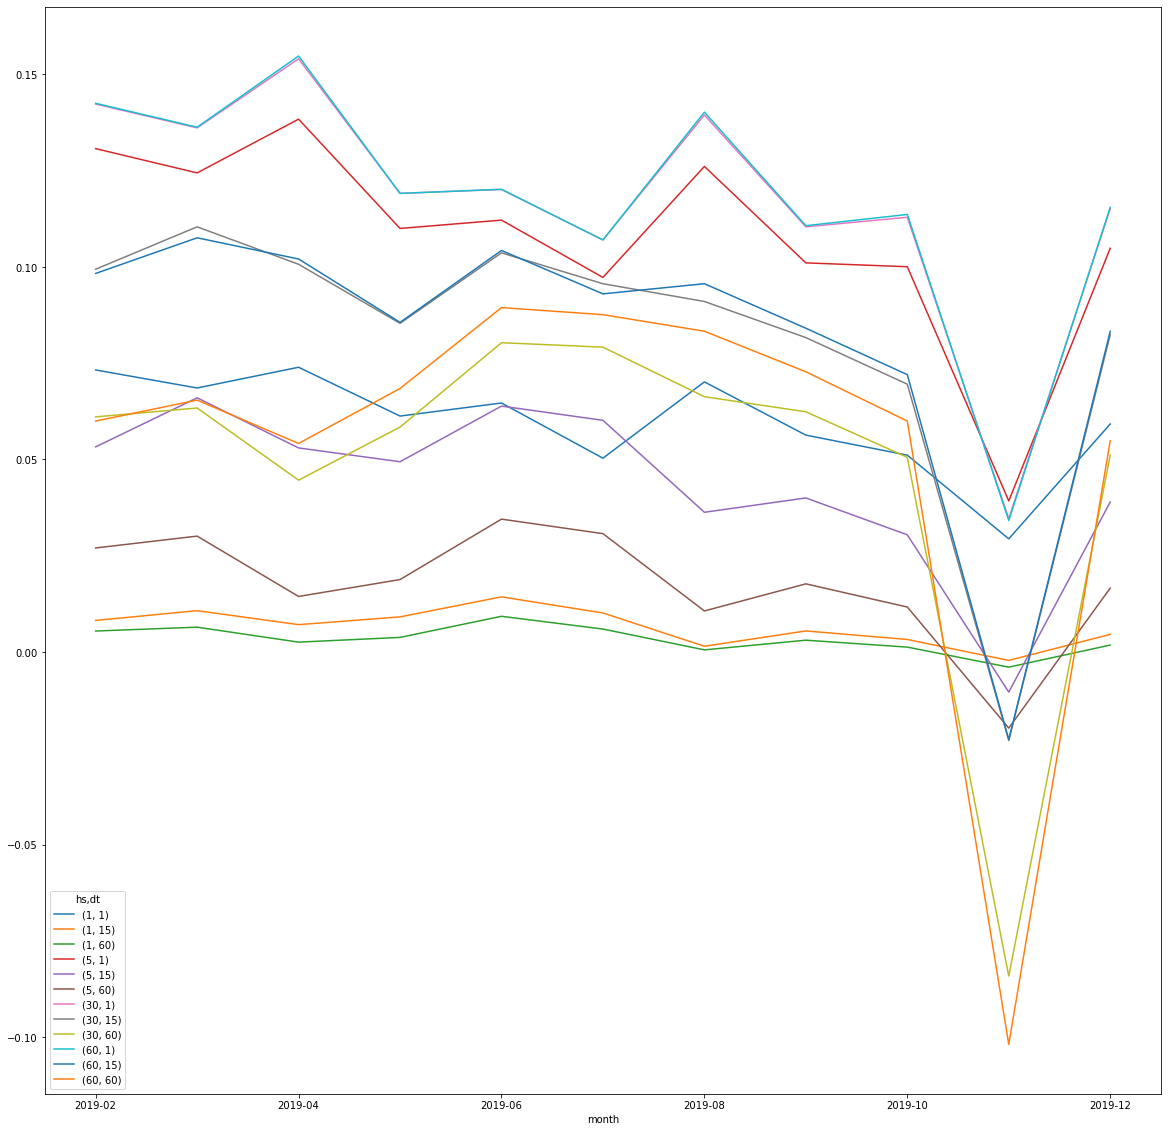

In [9]:
p)import matplotlib.pyplot as plt
p)import pandas as pd
p)q42=pd.read_csv('E:/pycharm/PycharmProjects/kdbq/w6/tb4_2.csv')
p)q42.pivot_table(index='month',columns=['hs','dt'],values='oop_r2').plot(figsize=(20,20))
p)plt.show()